EDA

Librerias

In [1]:
import tensorflow as tf
tf.random.set_seed(123)
import glob
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from optimize_cnn import create_initial_dataset, create_dataset_b, create_data_set
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
paths = glob.glob('.\\data\\*')
dict_path_classes = {f"{idx}":path.split('\\')[-1] for idx, path in enumerate(paths)}
dict_path_classes

{'0': 'Mild_Demented',
 '1': 'Moderate_Demented',
 '2': 'Non_Demented',
 '3': 'Very_Mild_Demented'}

In [4]:
X = []
y = []
for key, value in dict_path_classes.items():
    print(key, value)
    for path in glob.glob(f'.\\data\\{value}\\*.jpg'):
        img = plt.imread(path)
        X.append(img.reshape(128,128,1))
        y.append(key)

0 Mild_Demented
1 Moderate_Demented
2 Non_Demented
3 Very_Mild_Demented


In [5]:
dfy = pd.DataFrame(data=y, columns=["labels"])
dfy.value_counts()

labels
2         3200
3         2240
0          896
1           64
Name: count, dtype: int64

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
X_PCA=pd.DataFrame(np.array([i.reshape(128,128).flatten() for i in X]))

In [8]:
projections = PCA(3,random_state=123).fit_transform(X_PCA)

In [9]:
df_projections = pd.DataFrame(data=projections, columns=[f'x{i}' for i in range(1,4)])
df_projections

,x1,x2,x3
0,3189.331710,1115.094249,190.914037
1,3016.047018,433.588154,379.615476
2,3712.137280,-930.395994,1585.156292
3,3407.726277,-1676.888600,1268.490975
4,3326.014616,1147.149572,1820.782440
...,...,...,...
6395,-2736.844356,-724.539704,-115.871220
6396,-2350.664192,-1152.603625,321.430454
6397,-2520.322113,-1522.065152,-642.202712
6398,-2007.154052,624.855286,1943.445892


In [10]:
df_projections['label'] = y
df_projections

,x1,x2,x3,label
0,3189.331710,1115.094249,190.914037,0
1,3016.047018,433.588154,379.615476,0
2,3712.137280,-930.395994,1585.156292,0
3,3407.726277,-1676.888600,1268.490975,0
4,3326.014616,1147.149572,1820.782440,0
...,...,...,...,...
6395,-2736.844356,-724.539704,-115.871220,3
6396,-2350.664192,-1152.603625,321.430454,3
6397,-2520.322113,-1522.065152,-642.202712,3
6398,-2007.154052,624.855286,1943.445892,3


<Axes: >

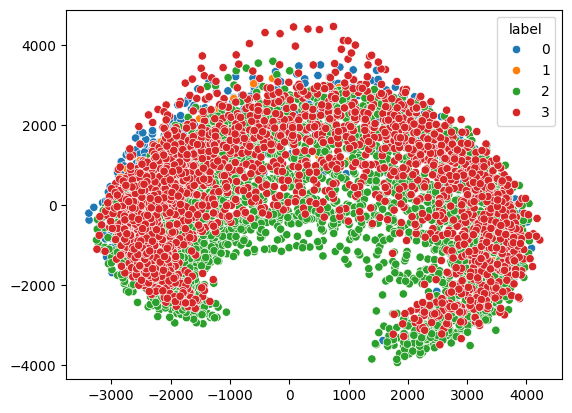

In [11]:
sns.scatterplot(data=df_projections,x=projections[:,0], y=projections[:,1], hue='label')

<Axes: >

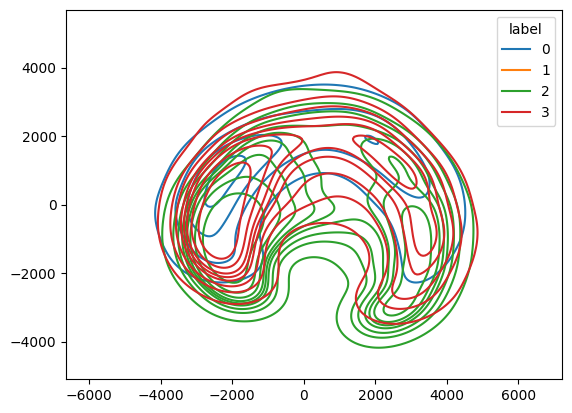

In [12]:
sns.kdeplot(data=df_projections,x=projections[:,0], y=projections[:,1], hue='label')

In [13]:
def create_dataset_b():
    y_b = []
    for label in y:
        if label in ["0","1", "3"]:
            y_b.append(1)
        else:
            y_b.append(0)
    return np.array(y_b)

In [14]:
y_b = create_dataset_b()
y_b.shape

(6400,)

In [15]:
df1 = pd.DataFrame(data=y_b, columns=["labels"])
df1.value_counts()

labels
0         3200
1         3200
Name: count, dtype: int64

In [17]:
df2 = pd.DataFrame(data=projections, columns=[f'x{i}' for i in range(1,4)])
df2

,x1,x2,x3
0,3189.331710,1115.094249,190.914037
1,3016.047018,433.588154,379.615476
2,3712.137280,-930.395994,1585.156292
3,3407.726277,-1676.888600,1268.490975
4,3326.014616,1147.149572,1820.782440
...,...,...,...
6395,-2736.844356,-724.539704,-115.871220
6396,-2350.664192,-1152.603625,321.430454
6397,-2520.322113,-1522.065152,-642.202712
6398,-2007.154052,624.855286,1943.445892


In [18]:
df2['label'] = y_b
df2

,x1,x2,x3,label
0,3189.331710,1115.094249,190.914037,1
1,3016.047018,433.588154,379.615476,1
2,3712.137280,-930.395994,1585.156292,1
3,3407.726277,-1676.888600,1268.490975,1
4,3326.014616,1147.149572,1820.782440,1
...,...,...,...,...
6395,-2736.844356,-724.539704,-115.871220,1
6396,-2350.664192,-1152.603625,321.430454,1
6397,-2520.322113,-1522.065152,-642.202712,1
6398,-2007.154052,624.855286,1943.445892,1


<Axes: >

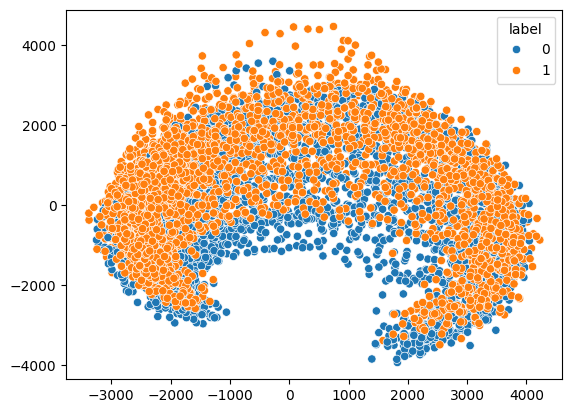

In [19]:
sns.scatterplot(data=df2,x=projections[:,0], y=projections[:,1], hue='label')

<Axes: >

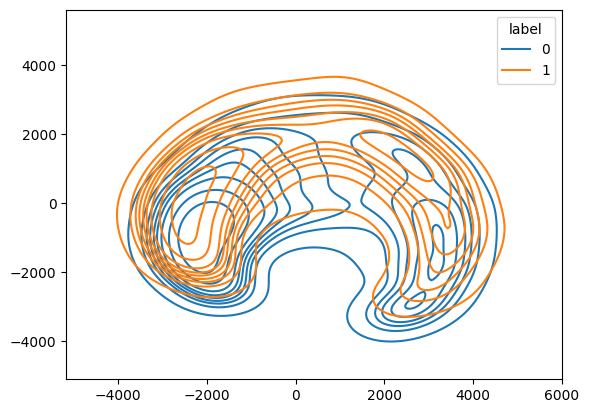

In [20]:
sns.kdeplot(data=df2,x=projections[:,0], y=projections[:,1], hue='label')

RED

En este punto, empleamos el framework Optuna, una herramienta que facilita la optimización de hiperparámetros en algoritmos como las redes neuronales. Optuna utiliza una combinación de algoritmos genéticos y otras técnicas de optimización con el objetivo de identificar la mejor solución posible dentro de un vasto conjunto de posibilidades. Además, aprovecha cálculos y técnicas estadísticas avanzadas para reducir tanto el tiempo de procesamiento como los recursos computacionales necesarios, sin sacrificar la eficiencia del proceso.

In [21]:
BATCH_SIZE = 12
EPOCHS = 100

def create_initial_dataset():
    """_summary_
    This function create 2 numpy arrays to generate initial dataset
    Returns:
        numpy.array: desing metrix
        numpy.array: observation vector
    """
    X = []
    y = []
    for key, value in dict_path_classes.items():
        for path in glob.glob(f'.\\data\\{value}\\*.jpg'):
            img = plt.imread(path)
            X.append(img.reshape(128,128,1))
            y.append(key)
    return np.array(X), np.array(y)

X, y = create_initial_dataset()

In [23]:
def create_cnn_model(trial):
    """_summary_

    Returns:
        _type_: _description_
    """
    kernel_sizes = [(2, 2), (3, 3)]
    kz_selected = trial.suggest_categorical("kernel_size", kernel_sizes)
    model = tf.keras.models.Sequential(name="Pretraining_CNN")
    model.add(tf.keras.layers.Input(shape=(128, 128,1), name="input_layer"))
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=kz_selected,
              padding='same', activation="relu", name="conv2D_1"))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=kz_selected,
              padding='same', activation="relu", name="conv2D_2"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name="max_pool_1"))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=kz_selected,
              padding='same', activation="relu", name="conv2D_3"))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=kz_selected,
              padding='same', activation="relu", name="conv2D_4"))
    model.add(tf.keras.layers.Flatten(name="flatten"))
    model.add(tf.keras.layers.Dense(256, activation='relu', name="MLP_1"))
    model.add(tf.keras.layers.Dropout(0.2, name="drop_out_1"))
    model.add(tf.keras.layers.Dense(128, activation='relu', name="MLP_2"))
    model.add(tf.keras.layers.Dropout(0.2, name="drop_out_2"))
    model.add(tf.keras.layers.Dense(64, activation='relu', name="MLP_3"))
    model.add(tf.keras.layers.Dropout(0.2, name="drop_out_3"))
    model.add(tf.keras.layers.Dense(
        2, activation='softmax', name="output_classification"))
    model.summary()
    return model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_b, random_state=123, test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, random_state=123, test_size=0.2)

In [26]:
def create_data_set():
    """_summary_

    Returns:
        _type_: _description_
    """
    train_ds = tf.data.Dataset.from_tensor_slices(tensors=(X_train, y_train))
    train_ds = train_ds.shuffle(buffer_size=len(
        y_train), seed=123).batch(batch_size=BATCH_SIZE)

    valid_ds = tf.data.Dataset.from_tensor_slices(tensors=(X_val, y_val))
    valid_ds = valid_ds.shuffle(buffer_size=len(
        y_val), seed=123).batch(batch_size=BATCH_SIZE)

    test_ds = tf.data.Dataset.from_tensor_slices(tensors=(X_test, y_test))
    test_ds = test_ds.shuffle(buffer_size=len(
        y_test), seed=123).batch(batch_size=BATCH_SIZE)
    return train_ds, valid_ds, test_ds

In [27]:
def create_optimizer(trial):
    kwargs = {}
    kwargs["learning_rate"] = trial.suggest_float(
        "learning_rate", 1e-4, 1e-2, log=True)
    optimizer = getattr(tf.optimizers, 'Adam')(**kwargs)
    return optimizer

In [28]:
def plot_loss_metric(history, params, _trial_id):
    """_summary_

    Args:
        history (_type_): _description_
        params (_type_): _description_
        _trial_id (_type_): _description_
    """
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss)+1)

    plt.figure(figsize=(25,15))
    kz, lr = params['kernel_size'], params['learning_rate']
    plt.suptitle(f'tria_id:{_trial_id} | kz:{kz} | lr:{lr}', fontsize=20, y=0.98)

    plt.subplot(1,2,1)
    plt.plot(epochs, train_loss, label='Loss on Training')
    plt.plot(epochs, val_loss, label='Loss on Validation')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title('Training and Validation loss', fontsize=20)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.subplot(1,2,2)
    plt.plot(epochs, train_acc, label='Accuracy on Training')
    plt.plot(epochs, val_acc, label='Accuracy on Validation')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('accuracy', fontsize=20)
    plt.title('Training and Validation loss', fontsize=20)


    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.savefig(f'loss_val_imgs/{_trial_id}_cnn.png')

In [29]:
def objective(trial):
    train_ds, valid_ds, test_ds = create_data_set()
    cnn_model = create_cnn_model(trial)
    optimizer = create_optimizer(trial)
    early_stop = EarlyStopping(
        monitor="val_loss", patience=7, mode="auto", verbose=1)
    cnn_model.compile(optimizer=optimizer,  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = cnn_model.fit(train_ds, validation_data=valid_ds,
                  epochs=EPOCHS, callbacks=[early_stop], verbose=2)
    plot_loss_metric(history, trial.__dict__['_cached_frozen_trial'].params, trial.__dict__['_trial_id'])
    acc = cnn_model.evaluate(test_ds)[1]
    if np.isnan(acc):
        return -np.inf
    return acc

[I 2023-10-08 17:18:56,741] Using an existing study with name 'optimizing_cnn_parameters_for_pretrain' instead of creating a new one.


Model: "Pretraining_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D_1 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 conv2D_2 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 64, 64, 32)        0         
                                                                 
 conv2D_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2D_4 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 MLP_1 (Dense)               (None, 256)           

[I 2023-10-08 17:21:59,428] Trial 10 finished with value: 0.989062488079071 and parameters: {'kernel_size': [3, 3], 'learning_rate': 0.00010730414053042049}. Best is trial 4 with value: 0.989062488079071.


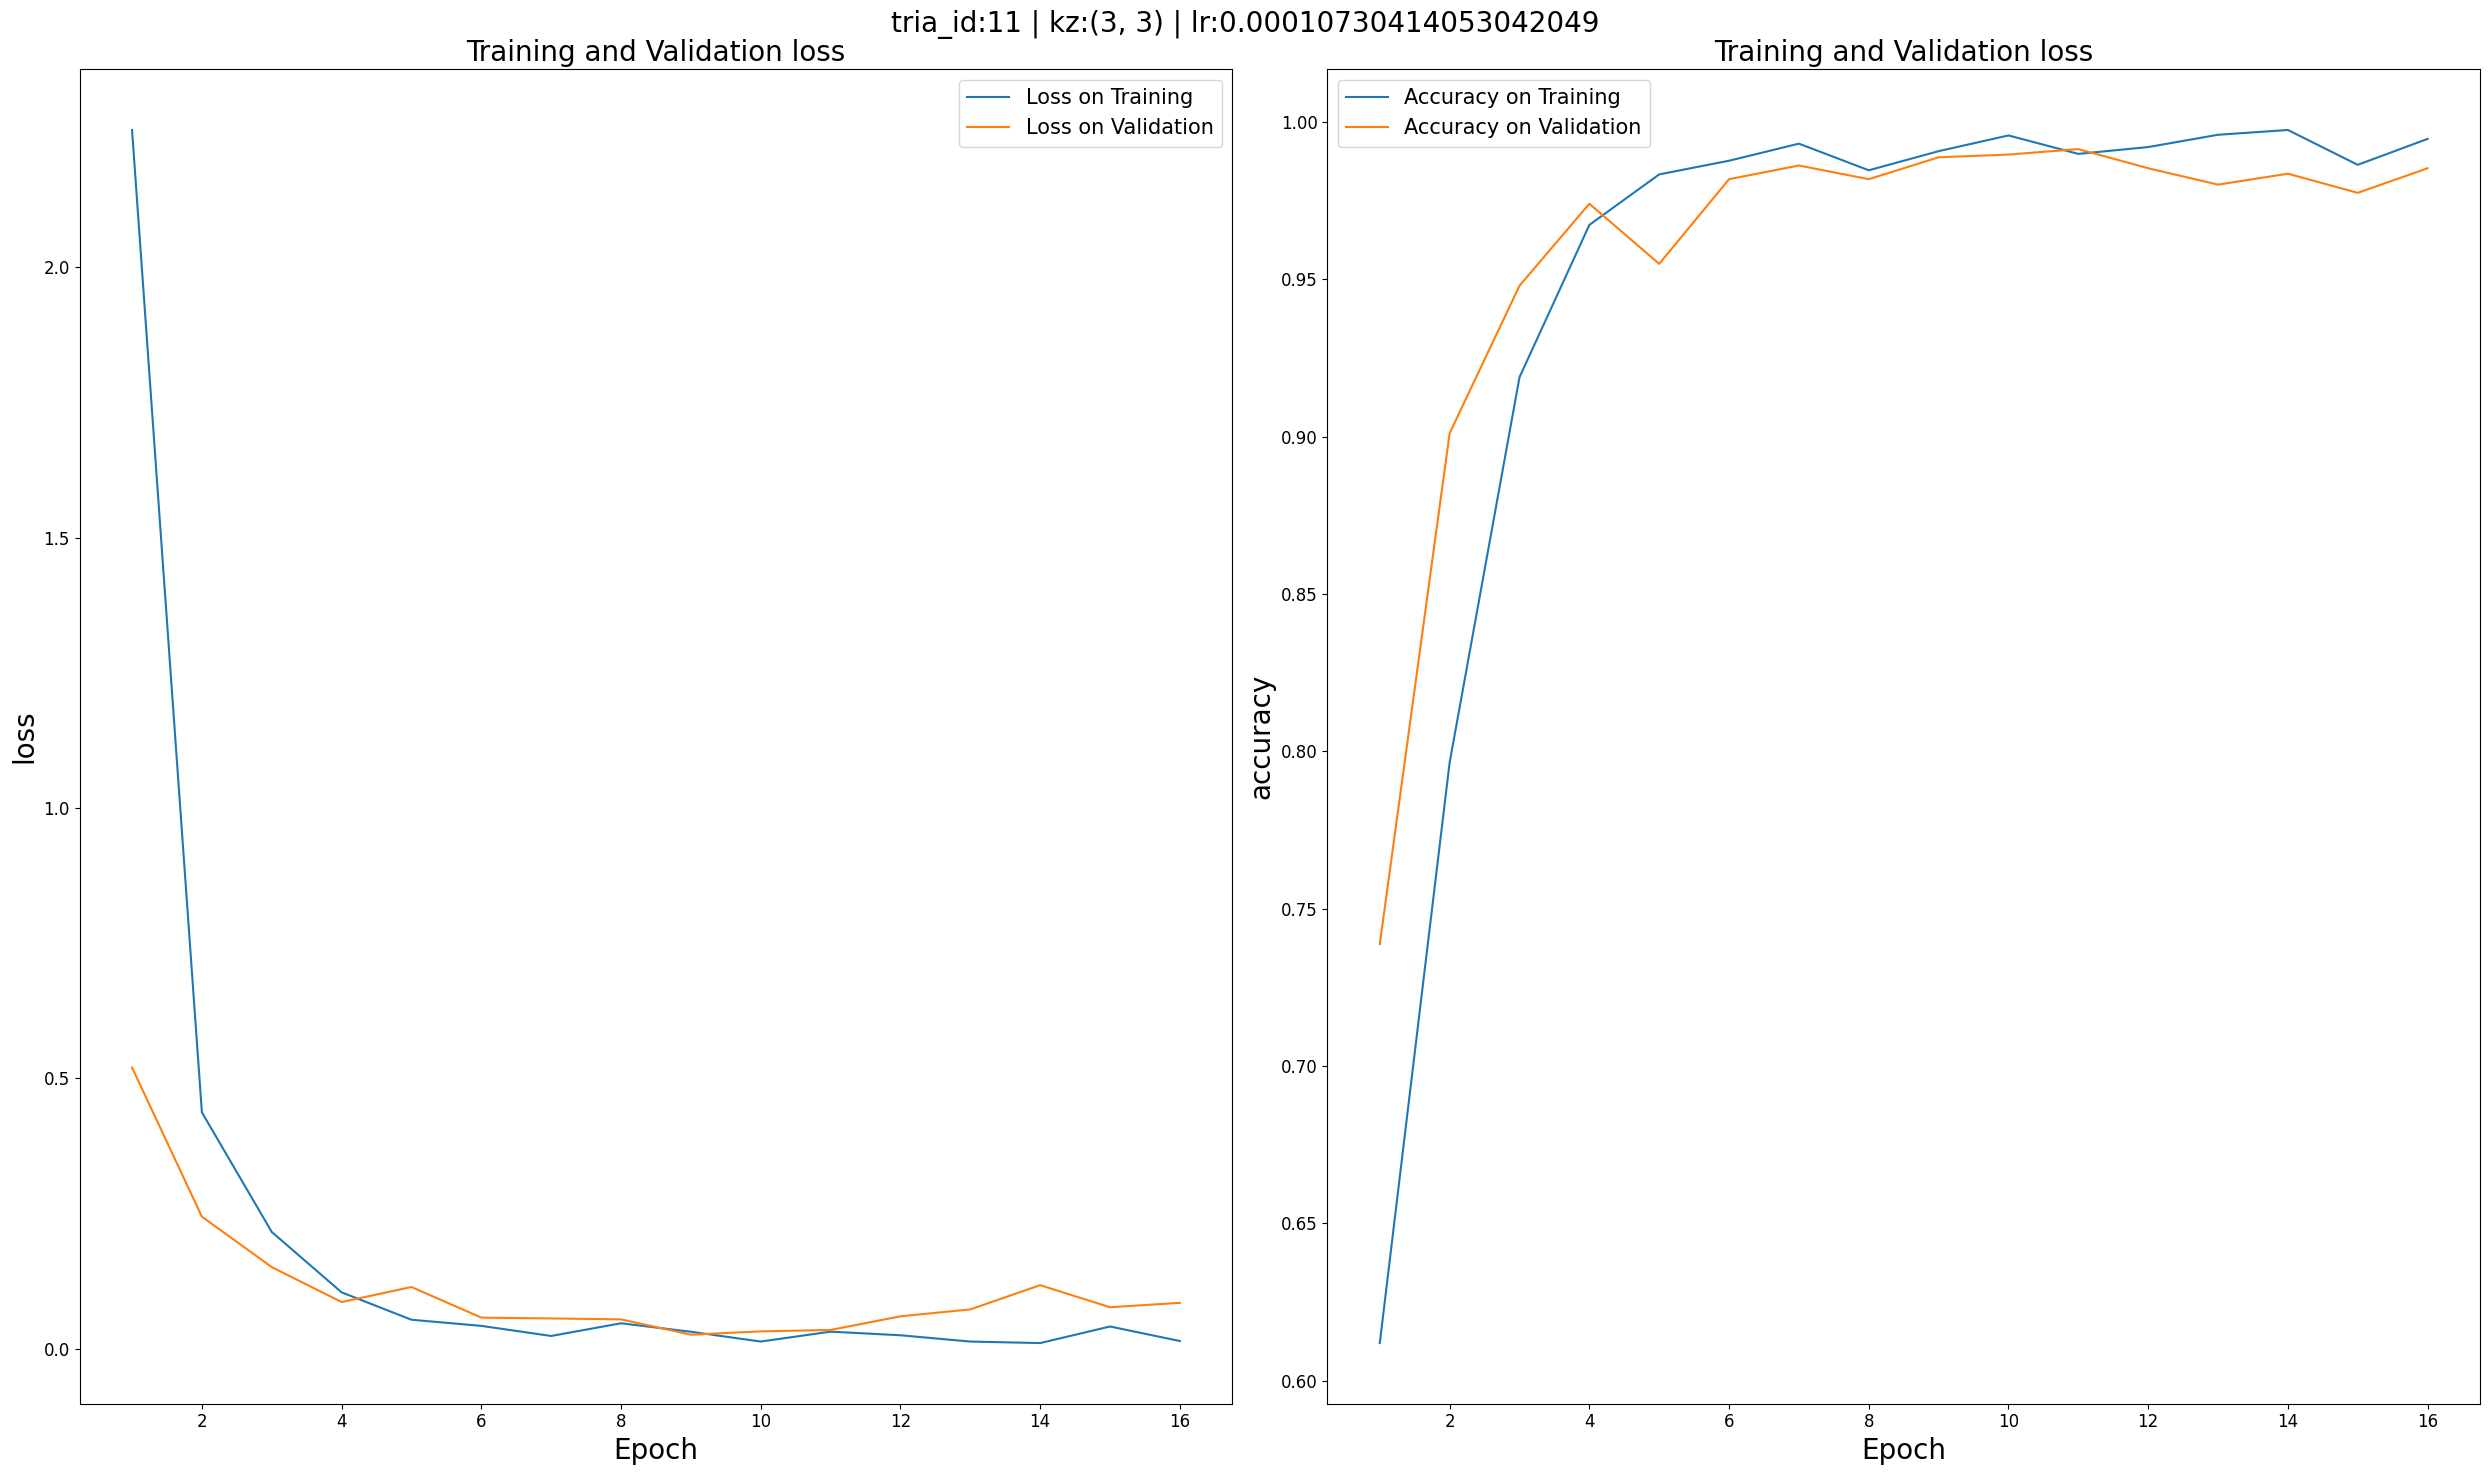

In [30]:
study = optuna.create_study(study_name="optimizing_cnn_parameters_for_pretrain",
                            storage='sqlite:///db/optimizing_cnn_parameters_for_pretrain.db', direction='maximize', load_if_exists=True)
study.optimize(objective, n_trials=1)

In [31]:
best_params = study.best_params 
best_params

{'kernel_size': [3, 3], 'learning_rate': 0.00011591261365393815}

In [32]:
model = tf.keras.models.Sequential(name="Pretraining_CNN")
model.add(tf.keras.layers.Input(shape=(128, 128,1), name="input_layer"))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=best_params['kernel_size'],
            padding='same', activation="relu", name="conv2D_1"))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=best_params['kernel_size'],
            padding='same', activation="relu", name="conv2D_2"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name="max_pool_1"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=best_params['kernel_size'],
            padding='same', activation="relu", name="conv2D_3"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=best_params['kernel_size'],
            padding='same', activation="relu", name="conv2D_4"))
model.add(tf.keras.layers.Flatten(name="flatten"))
model.add(tf.keras.layers.Dense(256, activation='relu', name="MLP_1"))
model.add(tf.keras.layers.Dropout(0.2, name="drop_out_1"))
model.add(tf.keras.layers.Dense(128, activation='relu', name="MLP_2"))
model.add(tf.keras.layers.Dropout(0.2, name="drop_out_2"))
model.add(tf.keras.layers.Dense(64, activation='relu', name="MLP_3"))
model.add(tf.keras.layers.Dropout(0.2, name="drop_out_3"))
model.add(tf.keras.layers.Dense(
    2, activation='softmax', name="output_classification"))
model.summary()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=best_params['learning_rate']),  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "Pretraining_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D_1 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 conv2D_2 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 64, 64, 32)        0         
                                                                 
 conv2D_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2D_4 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 MLP_1 (Dense)               (None, 256)           

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_b, random_state=123, test_size=0.1)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, random_state=123, test_size=0.2)

In [35]:
train_ds, valid_ds, test_ds = create_data_set()
early_stop = EarlyStopping(
    monitor="val_loss", patience=7, mode="auto", verbose=1)

In [36]:
history = model.fit(train_ds, validation_data=valid_ds,
                epochs=EPOCHS, callbacks=[early_stop], verbose=1)

Epoch 1/100
384/384 [==============================] - 12s 29ms/step - loss: 1.0618 - accuracy: 0.6790 - val_loss: 0.3838 - val_accuracy: 0.8446
Epoch 2/100
384/384 [==============================] - 11s 28ms/step - loss: 0.2677 - accuracy: 0.8891 - val_loss: 0.1221 - val_accuracy: 0.9531
Epoch 3/100
384/384 [==============================] - 11s 29ms/step - loss: 0.0671 - accuracy: 0.9770 - val_loss: 0.0690 - val_accuracy: 0.9748
Epoch 4/100
384/384 [==============================] - 11s 28ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0601 - val_accuracy: 0.9809
Epoch 5/100
384/384 [==============================] - 11s 29ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.0771 - val_accuracy: 0.9783
Epoch 6/100
384/384 [==============================] - 11s 29ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0646 - val_accuracy: 0.9792
Epoch 7/100
384/384 [==============================] - 11s 29ms/step - loss: 0.0179 - accuracy: 0.9954 - val_loss: 0.0368 - val_ac

In [39]:
def plot_loss_metric_train(history):
    """_summary_

    Args:
        history (_type_): _description_
        params (_type_): _description_
        _trial_id (_type_): _description_
    """
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss)+1)

    plt.figure(figsize=(25,15))


    plt.subplot(1,2,1)
    plt.plot(epochs, train_loss, label='Loss on Training')
    plt.plot(epochs, val_loss, label='Loss on Validation')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title('Training and Validation loss', fontsize=20)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.subplot(1,2,2)
    plt.plot(epochs, train_acc, label='Accuracy on Training')
    plt.plot(epochs, val_acc, label='Accuracy on Validation')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('accuracy', fontsize=20)
    plt.title('Training and Validation loss', fontsize=20)


    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)



    plt.tight_layout()
    plt.savefig('loss_val_imgs/best_params_cnn.png')


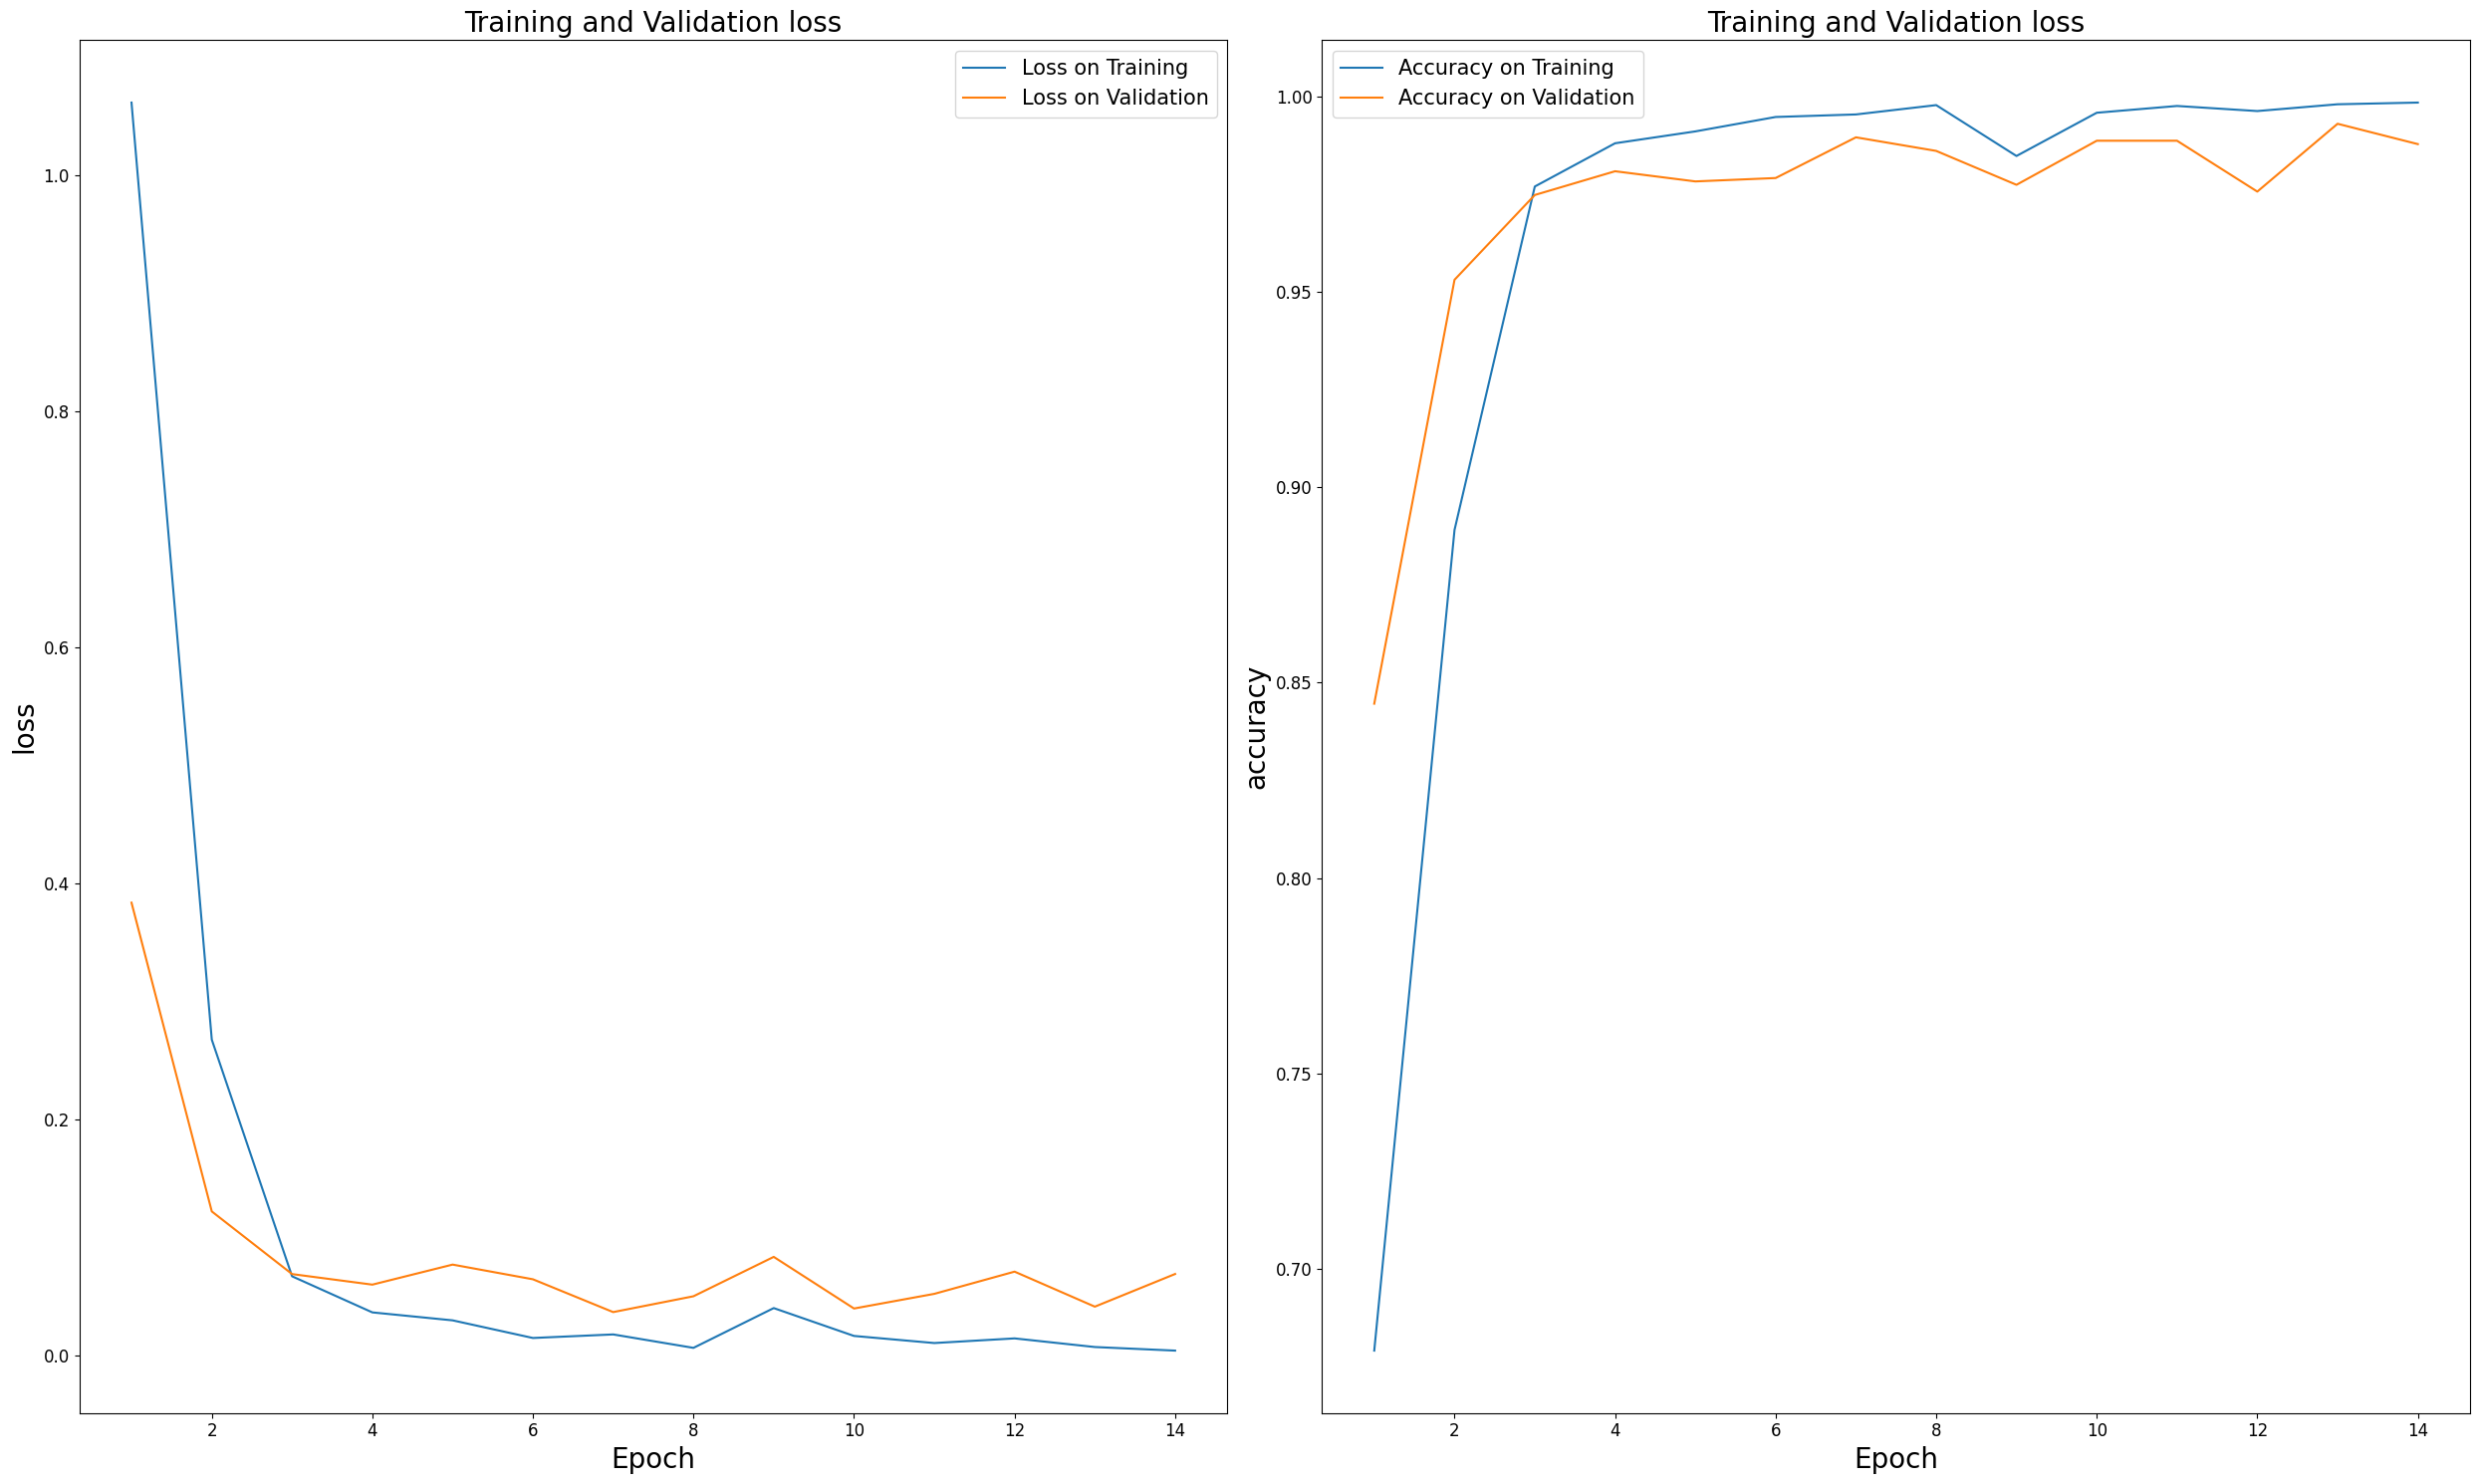

In [41]:
plot_loss_metric_train(history)

In [42]:
model.save('cnn_model/best_model.h5')

In [43]:
model = tf.keras.models.load_model("cnn_model/best_model.h5", compile=False)
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('MLP_3').output)

In [44]:
BATCH_SIZE = 12

ds = tf.data.Dataset.from_tensor_slices(tensors=(X, y_b))
ds = ds.shuffle(buffer_size = len(y_b), seed=123).batch(batch_size=BATCH_SIZE)

In [45]:
DB1 = intermediate_layer_model.predict(ds)

534/534 [==============================] - 3s 5ms/step


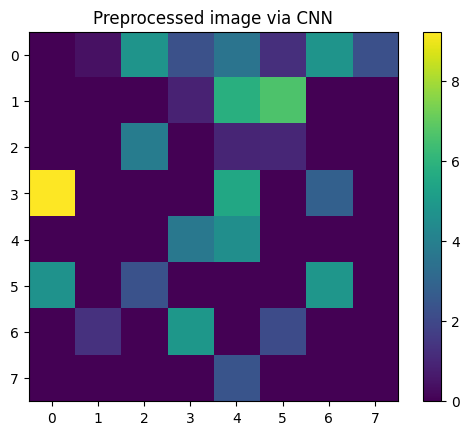

In [46]:
plt.imshow(DB1[0].reshape(8,8), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Preprocessed image via CNN")
plt.show()

In [47]:
DB1.shape

(6400, 64)

In [48]:
DB2=PCA(120,random_state=123).fit_transform(X_PCA)

In [49]:
DB3=pd.DataFrame(np.hstack([DB1,DB2]))
DB3

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.000000,0.415645,4.788221,2.288853,3.566193,1.245104,4.763144,2.236174,0.000000,0.000000,...,16.418521,-26.545927,-313.019964,-62.398341,-171.976458,5.179411,-167.943635,280.171491,86.169590,-20.975314
1,0.000000,1.029688,1.745169,0.913174,1.354490,0.727589,2.067995,1.477661,0.531368,1.238100,...,-56.953287,-163.102576,87.841717,266.236128,168.150606,-189.236477,139.686717,31.534217,76.940799,-163.133223
2,0.000000,4.208368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.938496,4.115489,...,261.611099,63.945031,-67.488780,40.346983,-298.128150,-79.484372,82.347982,-91.118446,80.662067,-61.796165
3,0.000000,0.389834,4.845829,1.497920,4.144731,2.695539,4.456145,2.443464,0.000000,0.000000,...,168.998549,-64.085660,-44.175040,-71.673662,59.926607,-219.319901,-83.815067,53.838871,45.400737,-166.733796
4,0.000000,3.927464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.662531,3.230104,...,-118.350422,40.809465,293.364044,-16.166208,-434.505139,-161.029784,-82.443938,306.987638,-84.237931,46.921116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0.000000,3.525907,0.000000,0.000000,0.000000,0.000000,0.311120,0.491015,3.941833,4.934460,...,213.694386,-53.654604,26.212131,-254.429311,228.626998,88.555920,178.670648,-293.211202,-36.189756,-244.476480
6396,0.000000,3.721076,0.000000,0.000000,0.369865,0.000000,0.000000,0.875299,6.146776,4.857594,...,488.011504,-27.235276,-34.970971,-177.232789,-107.556041,98.606397,-245.437705,144.912033,-53.246151,-110.806509
6397,0.000000,0.000000,5.340524,2.030620,3.918696,2.152165,4.050173,2.946299,0.000000,0.000000,...,-365.926588,-64.109221,-166.542308,89.235854,160.174382,260.136625,153.683672,-3.190700,97.441249,-247.922596
6398,0.000000,2.743380,0.000000,0.000000,0.000000,0.000000,0.000000,0.840861,3.786556,3.343189,...,51.479249,47.600027,14.716997,-188.281636,40.841524,20.996657,238.690987,-132.720025,168.599356,167.001016


In [50]:
svm_model = SVC(random_state=123)
xb_model = XGBClassifier(random_state=123)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

In [51]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(DB3,y_b, random_state=123, test_size=0.2)

In [ ]:
#Utilizamos grid search para optimizar los algoritmos


## SVM

In [52]:
svm_model.fit(X_train_,y_train_)
print(classification_report(y_test_,svm_model.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       639
           1       0.95      0.93      0.94       641

    accuracy                           0.94      1280
   macro avg       0.94      0.94      0.94      1280
weighted avg       0.94      0.94      0.94      1280



In [54]:
# Definir la grilla de hiperparámetros que deseas explorar
param_grid = {
    'C': [0.1, 1, 10],  # Valores de regularización
    'kernel': ['rbf', 'poly'],  # Tipos de kernel
    'gamma': ['scale', 'auto', 0.1, 1]  # Coeficiente gamma
}

# Crear un modelo SVM
svm_model = SVC()

# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo SVM utilizando Grid Search
grid_search.fit(X_train_, y_train_)

# Obtener el mejor modelo con los mejores hiperparámetros
best_svm_model = grid_search.best_estimator_

# Imprimir el reporte de clasificación del mejor modelo en los datos de prueba
y_pred = best_svm_model.predict(X_test_)
print(classification_report(y_test_, y_pred))

KeyboardInterrupt: 

## XB

In [72]:
xb_model.fit(X_train_,y_train_)
print(classification_report(y_test_,xb_model.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       639
           1       0.97      0.96      0.96       641

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280



In [73]:
knn_model.fit(X_train_,y_train_)
print(classification_report(y_test_,knn_model.predict(X_test_)))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [67]:
nb_model.fit(X_train_,y_train_)
print(classification_report(y_test_,nb_model.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       639
           1       0.66      0.63      0.64       641

    accuracy                           0.65      1280
   macro avg       0.65      0.65      0.65      1280
weighted avg       0.65      0.65      0.65      1280

